# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load and Discover Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [531]:
# Task: Import the pandas, numpy and joblib package
import pandas as pd
import numpy as np
import joblib as job

In [532]:
cd /home/jovyan/work

/home/jovyan/work


In [533]:
# Load custom functions
from src.indicator.sounds import beep_when_done

In [534]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**[1.2]** Task: Identify correct directory

In [535]:
! ls -l data/raw

total 996
drwxrwxrwx 1 root root   4096 Feb 19 04:51 archive
-rwxrwxrwx 1 root root 322813 Feb  8 10:25 test.csv
-rwxrwxrwx 1 root root 695622 Feb  8 10:25 train.csv


**[1.3]** Task: Load Test and Train Files into Pandas Data Frames

In [536]:
# File URLs
file_path_train = "data/raw/train.csv"
file_path_test= "data/raw/test.csv"

# Load files into df_training and df_validation data frames
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

**[1.4]** Task: Display Train and Test Data Frames

In [537]:
# Task: Display first 5 rows of df_train
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [538]:
# Task: Display first 5 rows of df_train
df_test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


**Observation:** Both datasets are identical with the exception the Test Dataset does not have the Target Variable. This is to be expected

**[1.5]** Task: Display Train and Test Shape

In [539]:
# Task: Display shape of df_train
df_train.shape

(8000, 21)

In [540]:
# Task: Display shape of df_test
df_test.shape

(3799, 20)

**[1.6]** Task: Display descriptive statistics for Train and Test Datasets

In [541]:
# Task: Describe df_train
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


**Observations**

**Outlier - Minimum Values** - Negative for GP, 3P Made, 3PA, FTM, BLK
* GP: -8 games
* 3P Made: -1.1 
* 3PA: -3.1
* FTM: 
* BLK: -17.9

**Outlier - Maximum Values**
* MIN - A max value of 73.8 minutes played per game appears high, particularly with 75% at 23.5 - may have some outlier records
* a NBA Game has 48 minutes per game


In [542]:
# Task: Describe df_train
df_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


**Obervations**
* Negative Values exist in a number of columns
* Mean and Standard Deviation between train and test appear to be reasonably well aligned


**[1.7]** Task: Identify Missing Values

In [543]:
# Task: Display Summary (Info)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

**Oberservation** 
There are no missing values in this dataset

**[1.8]** Task: Investigate Column Details - Find Min Values for each columns

In [544]:
df_train.min()

Id              4.0
GP             -8.0
MIN             2.9
PTS             0.8
FGM             0.3
FGA             0.8
FG%            21.3
3P Made        -1.1
3PA            -3.1
3P%           -38.5
FTM             0.0
FTA             0.0
FT%           -13.3
OREB            0.0
DREB            0.2
REB             0.3
AST             0.0
STL             0.0
BLK           -17.9
TOV             0.1
TARGET_5Yrs     0.0
dtype: float64

**[1.8.1]** Task: Find Rows where GP (Games Played) is negative

**Observated Statistics**
The following columns do not appear to have reliable information, they do not fit the profile of the statistic
* 3P Made - Negative Numbers should not be possible
* 3PA - Points Attempted should always be the same or greater than Points Made
* 3P% - Calculation of % should be (Points Made / Points Attempted) within a certain tolerance of error (due to rounding)
* FTM - Negative Numbers should not be possible
* FTA - Points Attempted should always be the same or greater than Points Made
* FT% 
* BLK  - Negative Numbers should not be possible


**[1.9]** Task: Check for duplicates

In [545]:
# Identify Rows that are Duplicated
dup = df_train.duplicated()
df_train[dup]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


In [546]:
# Identify Rows that are Duplicated
dup = df_test.duplicated()
df_test[dup]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV


## 2. Feature Engineering

No creation of new features at this time.

**[2.1]** Create copy of Training and Test Datasets


In [547]:
# Create copy of df_train and df_test
df_train_cleaned = df_train
df_test_cleaned = df_test

**[2.2]** Split into X & y

In [548]:
from src.data.sets import pop_target

In [549]:
X_train_cleaned, y_train_cleaned = pop_target(df = df_train_cleaned,target_col = 'TARGET_5Yrs',to_numpy=False)

In [550]:
X_test_cleaned = df_test_cleaned

**[2.2]** Task: Clear any negative values

In [551]:
from src.data.clean import null_numeric_values

In [552]:
null_numeric_values(X_train_cleaned, ['GP','3P Made','3PA','3P%','FT%','BLK'], '<', 0.1 )

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,10556,80.0,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,5342,75.0,21.8,10.5,4.2,7.9,55.1,0.4,1.2,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,5716,85.0,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,13790,63.0,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,5470,63.0,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,32.0,9.2,1.8,0.7,1.8,40.3,0.4,1.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4
7996,11679,54.0,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3
7997,5537,85.0,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8
7998,1292,39.0,7.7,2.5,1.0,2.3,40.1,0.4,1.2,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5


In [553]:
null_numeric_values(X_test_cleaned, ['3P Made','3PA','3P%','BLK'], '<', 0.1 )

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.4,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.2,0.4,1.2,22.8,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,8176,49,16.3,6.4,2.9,6.6,44.4,0.4,1.2,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,8178,53,9.9,2.1,0.8,1.8,43.1,0.4,1.2,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,8181,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [554]:
null_numeric_values(X_train_cleaned, ['3P%','FT%','FG%'], '>', 99.9 )

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,10556,80.0,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,5342,75.0,21.8,10.5,4.2,7.9,55.1,0.4,1.2,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,5716,85.0,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,13790,63.0,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,5470,63.0,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,32.0,9.2,1.8,0.7,1.8,40.3,0.4,1.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4
7996,11679,54.0,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3
7997,5537,85.0,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8
7998,1292,39.0,7.7,2.5,1.0,2.3,40.1,0.4,1.2,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5


In [555]:
null_numeric_values(X_test_cleaned, ['3P%','FT%','FG%'], '>', 99.9 )

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.4,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.2,0.4,1.2,22.8,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,8176,49,16.3,6.4,2.9,6.6,44.4,0.4,1.2,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,8178,53,9.9,2.1,0.8,1.8,43.1,0.4,1.2,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,8181,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


**[2.4]** Task: Substitude positive abnormal value

By research, the history highest records for all below columns are, for columns with values larger than below values, substitute with mode.
* MIN: 45.8 Wilt Chamberlain
* PTS: 30.1 Michael Jordan
* FG%: 72.8 Robert Williams III
* 3P Made: 3.78 Stephen Curry
* 3P%: 0.45 Steve Kerr
* FT%: 90.69 Stephen Curry
* REB: 22.89 Wilt Chamberlain
* AST: 11.19 Magic Johnson
* STL: 2.71 Alvin Robertson
* BLK:  3.83 Hakeem Olajuwon
* TOV: 4.1 Russell Westbrook

In [556]:
# Create array with maximum scores for metrics
dic_max_scores = [
       ('MIN', 45.8),
       ('PTS', 30.1),
       ('FG%', 72.8),
       ('3P Made', 3.78), 
       ('3P%', 45),
       ('FT%', 90.69), 
       ('REB', 22.89),
       ('AST', 11.19),
       ('STL', 2.71),
       ('BLK', 3.83), 
       ('TOV', 4.1)
]

In [557]:
# For each Column clear the value and substi
for col, max_value in dic_max_scores:
    
    null_numeric_values(X_train_cleaned, [col], '>',max_value)
    null_numeric_values(X_test_cleaned, [col], '>',max_value)

In [558]:
X_test_cleaned.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.404764,7.314820,2.835404,6.302580,44.591182,0.429218,1.212582,21.197499,1.399842,1.953567,70.658805,1.096025,2.179495,3.275783,1.636483,0.653593,0.368755,1.253146
std,3954.173641,17.151740,8.212065,4.255969,1.688427,3.579221,6.020513,0.224404,0.677320,10.411805,0.926140,1.250376,9.166715,0.785678,1.371935,2.070646,1.335496,0.410573,0.295624,0.699861
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,0.100000,0.100000,0.100000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,0.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.300000,0.800000,13.700000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.200000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.400000,1.200000,21.900000,1.200000,1.700000,70.800000,0.900000,1.900000,2.800000,1.300000,0.600000,0.300000,1.100000
75%,10402.500000,74.000000,23.000000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,27.700000,1.900000,2.600000,76.900000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,45.400000,30.100000,13.400000,26.200000,67.700000,1.600000,4.300000,45.000000,7.800000,9.800000,90.600000,6.900000,12.000000,18.500000,9.000000,2.700000,3.600000,4.100000


Task: Display df_train_cleaned Information

In [559]:
# Display df_train_cleaned information
X_train_cleaned.max()

Id         13798.0
GP           123.0
MIN           45.8
PTS           28.9
FGM           13.1
FGA           28.9
FG%           67.2
3P Made        1.7
3PA            4.7
3P%           45.0
FTM            8.1
FTA           11.1
FT%           90.6
OREB           5.5
DREB          11.0
REB           15.9
AST           10.7
STL            2.6
BLK            3.8
TOV            4.1
dtype: float64

In [560]:
X_test_cleaned.max()

Id         13792.0
GP           126.0
MIN           45.4
PTS           30.1
FGM           13.4
FGA           26.2
FG%           67.7
3P Made        1.6
3PA            4.3
3P%           45.0
FTM            7.8
FTA            9.8
FT%           90.6
OREB           6.9
DREB          12.0
REB           18.5
AST            9.0
STL            2.7
BLK            3.6
TOV            4.1
dtype: float64

**[222]** Task: Clean and recalculate % fields

In [561]:
from src.features.percentages import calculate_percentage

In [562]:
X_train_cleaned = calculate_percentage(X_train_cleaned,numerator_col='FGM',denominator_col='FGA',result_col='FG%',round_result=1)
X_train_cleaned = calculate_percentage(X_train_cleaned,numerator_col='3P Made',denominator_col='3PA',result_col='3P%',round_result=1)
X_train_cleaned = calculate_percentage(X_train_cleaned,numerator_col='FTM',denominator_col='FTA',result_col='FT%',round_result=1)

In [563]:
X_test_cleaned = calculate_percentage(X_test_cleaned,numerator_col='FGM',denominator_col='FGA',result_col='FG%',round_result=1)
X_test_cleaned = calculate_percentage(X_test_cleaned,numerator_col='3P Made',denominator_col='3PA',result_col='3P%',round_result=1)
X_test_cleaned = calculate_percentage(X_test_cleaned,numerator_col='FTM',denominator_col='FTA',result_col='FT%',round_result=1)

**[223]** Task: Create Features: FG_Missed, 3P_Missed, FT_Missed

In [564]:
X_train_cleaned['FG_Missed'] = X_train_cleaned['FGA'] - X_train_cleaned['FGM']
X_train_cleaned['3P_Missed'] = X_train_cleaned['3PA'] - X_train_cleaned['3P Made']
X_train_cleaned['FT_Missed'] = X_train_cleaned['FTA'] - X_train_cleaned['FTM']

In [565]:
X_test_cleaned['FG_Missed'] = X_test_cleaned['FGA'] - X_test_cleaned['FGM']
X_test_cleaned['3P_Missed'] = X_test_cleaned['3PA'] - X_test_cleaned['3P Made']
X_test_cleaned['FT_Missed'] = X_test_cleaned['FTA'] - X_test_cleaned['FTM']

In [566]:
X_train_cleaned['FG_Missed'] = X_train_cleaned['FG_Missed'].round(1)
X_train_cleaned['3P_Missed'] = X_train_cleaned['3P_Missed'].round(1)
X_train_cleaned['FT_Missed'] = X_train_cleaned['FT_Missed'].round(1)

In [567]:
X_test_cleaned['FG_Missed'] = X_test_cleaned['FG_Missed'].round(1)
X_test_cleaned['3P_Missed'] = X_test_cleaned['3P_Missed'].round(1)
X_test_cleaned['FT_Missed'] = X_test_cleaned['FT_Missed'].round(1)

In [568]:
X_train_cleaned.sort_values(by=['BLK'], ascending=True).head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,OREB,DREB,REB,AST,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed
6777,10523,63.0,22.6,9.4,3.6,9.1,39.6,0.7,2.4,29.2,...,0.4,1.4,1.9,1.6,0.7,0.1,1.2,5.5,1.7,0.1
3736,10434,89.0,16.6,6.1,2.7,6.0,45.0,0.4,1.2,33.3,...,0.9,1.0,1.8,1.1,0.7,0.1,1.2,3.3,0.8,0.4
7018,10452,85.0,12.0,4.8,1.7,3.9,43.6,0.2,0.6,33.3,...,0.7,1.9,2.4,1.9,0.3,0.1,1.5,2.2,0.4,0.5
7017,8008,76.0,26.9,9.5,3.6,8.7,41.4,0.2,0.7,28.6,...,0.5,1.4,1.9,5.1,1.5,0.1,1.5,5.1,0.5,0.8
1693,4605,96.0,23.9,10.1,4.0,8.3,48.2,0.4,1.2,33.3,...,1.4,1.8,3.4,5.0,1.5,0.1,1.6,4.3,0.8,0.8
936,11627,57.0,16.2,7.4,2.6,4.7,55.3,0.1,0.1,7.9,...,1.5,2.1,3.4,0.8,0.6,0.1,0.9,2.1,0.0,1.4
5807,1336,76.0,32.2,10.1,3.2,8.8,36.4,1.2,3.6,33.3,...,0.6,3.9,4.4,3.5,1.4,0.1,1.4,5.6,2.4,0.4
934,11792,66.0,20.0,8.1,3.1,6.5,47.7,0.4,1.2,33.3,...,1.0,2.9,3.8,2.6,0.4,0.1,2.1,3.4,0.8,0.9
5812,575,48.0,9.3,3.7,1.5,3.0,50.0,0.2,0.7,28.6,...,0.2,0.8,1.1,0.5,0.1,0.1,0.5,1.5,0.5,0.2
933,7188,52.0,29.1,11.0,4.6,11.8,39.0,0.6,2.1,28.6,...,1.5,3.5,5.2,1.5,0.9,0.1,1.2,7.2,1.5,0.5


In [569]:
X_train_cleaned.min()

Id            4.0
GP            1.0
MIN           2.9
PTS           0.8
FGM           0.3
FGA           0.8
FG%          25.0
3P Made       0.1
3PA           0.1
3P%           0.3
FTM           0.0
FTA           0.0
FT%           0.0
OREB          0.0
DREB          0.2
REB           0.3
AST           0.0
STL           0.0
BLK           0.1
TOV           0.1
FG_Missed     0.5
3P_Missed     0.0
FT_Missed     0.0
dtype: float64

In [570]:
X_test_cleaned.max()

Id           13792.0
GP             126.0
MIN             45.4
PTS             30.1
FGM             13.4
FGA             26.2
FG%             81.2
3P Made          1.6
3PA              4.3
3P%             80.0
FTM              7.8
FTA              9.8
FT%             97.3
OREB             6.9
DREB            12.0
REB             18.5
AST              9.0
STL              2.7
BLK              3.6
TOV              4.1
FG_Missed       13.6
3P_Missed        2.9
FT_Missed        3.2
dtype: float64

**[2.]** Task: Create Player Efficiency Rating

In [571]:
from src.features.player_efficiency_rating import calculate_player_efficiency_rating

In [572]:
calculate_player_efficiency_rating(X_train_cleaned)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,AST,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed,PPER,NPER,PER
0,10556,80.0,24.3,7.8,3.0,6.4,46.9,0.1,0.3,33.3,...,3.2,1.1,0.2,1.6,3.4,0.2,0.9,26.8,11.8,15.0
1,5342,75.0,21.8,10.5,4.2,7.9,53.2,0.4,1.2,33.3,...,0.7,0.5,0.6,1.4,3.7,0.8,1.2,35.1,13.5,21.6
2,5716,85.0,19.1,4.5,1.9,4.5,42.2,0.4,1.2,33.3,...,0.8,0.4,0.2,0.6,2.6,0.8,0.2,16.2,9.8,6.4
3,13790,63.0,19.1,8.2,3.5,6.7,52.2,0.3,0.8,37.5,...,1.8,0.4,0.1,1.9,3.2,0.5,0.6,26.5,15.3,11.2
4,5470,63.0,17.8,3.7,1.7,3.4,50.0,0.5,1.4,35.7,...,0.4,0.4,0.6,0.7,1.7,0.9,0.3,21.0,7.8,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,32.0,9.2,1.8,0.7,1.8,38.9,0.4,1.2,33.3,...,0.5,0.3,0.2,0.4,1.1,0.8,0.2,19.5,9.4,10.1
7996,11679,54.0,6.0,1.8,0.7,1.4,50.0,0.1,0.1,3.1,...,0.1,0.0,0.3,0.3,0.7,0.0,0.2,24.2,9.6,14.6
7997,5537,85.0,28.2,10.7,4.0,9.0,44.4,0.2,0.6,33.3,...,3.4,1.2,0.2,1.8,5.0,0.4,1.1,26.4,14.0,12.4
7998,1292,39.0,7.7,2.5,1.0,2.3,43.5,0.4,1.2,33.3,...,0.2,0.3,0.3,0.5,1.3,0.8,0.1,25.2,13.5,11.7


In [573]:
calculate_player_efficiency_rating(X_test_cleaned)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,AST,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed,PPER,NPER,PER
0,1,56,9.1,4.0,1.6,3.7,43.2,0.1,0.3,33.3,...,0.4,0.2,0.3,0.8,2.1,0.2,0.5,29.7,18.4,11.3
1,8194,43,19.3,10.1,3.7,8.1,45.7,0.6,1.7,35.3,...,3.5,0.6,0.4,1.8,4.4,1.1,0.7,32.9,18.5,14.4
2,3,82,33.9,11.3,4.9,10.6,46.2,0.5,1.9,26.3,...,2.5,1.3,0.3,2.0,5.7,1.4,0.9,23.6,13.1,10.5
3,8196,86,44.7,18.8,6.8,15.9,42.8,0.5,1.8,27.8,...,4.1,0.9,0.1,3.6,9.1,1.3,1.8,25.1,16.4,8.7
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,29.4,...,1.5,0.5,0.4,0.9,2.4,1.2,0.2,26.5,15.5,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.7,0.4,1.2,33.3,...,1.5,0.6,0.3,2.0,3.3,0.8,0.8,28.2,14.3,13.9
3795,8176,49,16.3,6.4,2.9,6.6,43.9,0.4,1.2,33.3,...,0.4,0.4,0.4,0.7,3.7,0.8,0.9,29.2,15.8,13.4
3796,8178,53,9.9,2.1,0.8,1.8,44.4,0.4,1.2,33.3,...,0.4,0.4,0.2,0.5,1.0,0.8,0.4,20.5,8.7,11.8
3797,8181,89,38.3,14.5,5.4,11.8,45.8,0.5,1.2,41.7,...,3.7,1.3,0.3,2.4,6.4,0.7,0.4,24.4,13.3,11.1


In [618]:
X_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      8000 non-null   int64
dtypes: int64(1)
memory usage: 62.6 KB


## 3. Save and Split Datasets

**[222]** Task: Save as Interim - train & test

In [575]:
df_train_interim = pd.concat([X_train_cleaned, y_train_cleaned], axis=1)

In [576]:
# Save to CSV - train & test.csv
df_train_interim.to_csv("data/interim/train.csv", index = False)
X_test_cleaned.to_csv("data/interim/test.csv", index = False)

**[2.3]** Task: Import and Normalise all statistic columns

In [577]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate Scaler
scaler = MinMaxScaler()

In [578]:
X_train_cleaned_scaled_cols = X_train_cleaned.loc[:,X_train_cleaned.columns!='Id']
X_test_cleaned_scaled_cols =  X_test_cleaned.loc[:,X_test_cleaned.columns!='Id']

In [579]:
X_train_cleaned_scaled_cols.max()

GP           123.0
MIN           45.8
PTS           28.9
FGM           13.1
FGA           28.9
FG%           72.4
3P Made        1.7
3PA            4.7
3P%           80.0
FTM            8.1
FTA           11.1
FT%           97.2
OREB           5.5
DREB          11.0
REB           15.9
AST           10.7
STL            2.6
BLK            3.8
TOV            4.1
FG_Missed     17.3
3P_Missed      3.1
FT_Missed      3.1
PPER         110.1
NPER          59.9
PER           68.1
dtype: float64

In [580]:
X_test_cleaned_scaled_cols.max()

GP           126.0
MIN           45.4
PTS           30.1
FGM           13.4
FGA           26.2
FG%           81.2
3P Made        1.6
3PA            4.3
3P%           80.0
FTM            7.8
FTA            9.8
FT%           97.3
OREB           6.9
DREB          12.0
REB           18.5
AST            9.0
STL            2.7
BLK            3.6
TOV            4.1
FG_Missed     13.6
3P_Missed      2.9
FT_Missed      3.2
PPER         111.2
NPER          54.5
PER           66.2
dtype: float64

In [581]:
# Scale Columns
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned_scaled_cols)
X_test_cleaned_scaled = scaler.fit_transform(X_test_cleaned_scaled_cols)

In [582]:
# Convert numpy arrany df_train_cleaned_scaled values back to df_train_cleaned_scaled data frame 
X_train_cleaned_scaled = pd.DataFrame(np.squeeze(X_train_cleaned_scaled), columns=X_train_cleaned_scaled_cols.columns) 
X_test_cleaned_scaled = pd.DataFrame(np.squeeze(X_test_cleaned_scaled), columns=X_test_cleaned_scaled_cols.columns) 

In [583]:
X_train_cleaned.columns

Index(['Id', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'FG_Missed', '3P_Missed', 'FT_Missed', 'PPER', 'NPER', 'PER'],
      dtype='object')

In [584]:
# Drop original columns with standard values
X_train_cleaned = X_train_cleaned.drop(X_train_cleaned_scaled.columns,axis=1)
X_test_cleaned = X_test_cleaned.drop(X_test_cleaned_scaled.columns,axis=1)

In [585]:
# Concatenate frames to re-construct with scaled values + target (as appropriate)
df_train_cleaned = pd.concat([X_train_cleaned, X_train_cleaned_scaled], axis=1)
df_test_cleaned = pd.concat([X_test_cleaned, X_test_cleaned_scaled], axis=1)

In [586]:
df_train_cleaned.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,AST,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed,PPER,NPER,PER
0,10556,0.647541,0.498834,0.249110,0.210938,0.199288,0.462025,0.0000,0.043478,0.414053,...,0.299065,0.423077,0.027027,0.375,0.172619,0.064516,0.290323,0.134096,0.134892,0.271605
1,5342,0.606557,0.440559,0.345196,0.304688,0.252669,0.594937,0.1875,0.239130,0.414053,...,0.065421,0.192308,0.135135,0.325,0.190476,0.258065,0.387097,0.220374,0.165468,0.362140
2,5716,0.688525,0.377622,0.131673,0.125000,0.131673,0.362869,0.1875,0.239130,0.414053,...,0.074766,0.153846,0.027027,0.125,0.125000,0.258065,0.064516,0.023909,0.098921,0.153635
3,13790,0.508197,0.377622,0.263345,0.250000,0.209964,0.573840,0.1250,0.152174,0.466750,...,0.168224,0.153846,0.000000,0.450,0.160714,0.161290,0.193548,0.130977,0.197842,0.219479
4,5470,0.508197,0.347319,0.103203,0.109375,0.092527,0.527426,0.2500,0.282609,0.444166,...,0.037383,0.153846,0.135135,0.150,0.071429,0.290323,0.096774,0.073805,0.062950,0.246914
5,1961,0.713115,0.398601,0.284698,0.265625,0.281139,0.369198,0.1875,0.239130,0.414053,...,0.168224,0.153846,0.054054,0.250,0.267857,0.258065,0.258065,0.189189,0.242806,0.262003
6,2677,0.565574,0.412587,0.220641,0.226562,0.163701,0.723629,0.0000,0.239130,0.100376,...,0.056075,0.153846,0.162162,0.275,0.101190,0.354839,0.225806,0.140333,0.093525,0.311385
7,11722,0.459016,0.342657,0.163701,0.109375,0.138790,0.236287,0.5000,0.586957,0.398996,...,0.037383,0.230769,0.135135,0.050,0.148810,0.612903,0.129032,0.082121,0.120504,0.213992
8,6148,0.368852,0.550117,0.302491,0.218750,0.227758,0.381857,0.3125,0.347826,0.439147,...,0.168224,0.269231,0.135135,0.400,0.214286,0.354839,0.096774,0.093555,0.149281,0.207133
9,3040,0.516393,0.710956,0.572954,0.476562,0.373665,0.666667,0.1250,0.217391,0.338770,...,0.074766,0.153846,0.648649,0.575,0.261905,0.258065,0.387097,0.208940,0.149281,0.359396


In [587]:
df_test_cleaned.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,AST,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed,PPER,NPER,PER
0,1,0.416667,0.129496,0.112245,0.099237,0.114173,0.312839,0.000000,0.047619,0.414787,...,0.044444,0.074074,0.057143,0.175,0.122137,0.068966,0.15625,0.158927,0.283730,0.170695
1,8194,0.308333,0.374101,0.319728,0.259542,0.287402,0.358047,0.333333,0.380952,0.439850,...,0.388889,0.222222,0.085714,0.425,0.297710,0.379310,0.21875,0.191950,0.285714,0.217523
2,3,0.633333,0.724221,0.360544,0.351145,0.385827,0.367089,0.266667,0.428571,0.327068,...,0.277778,0.481481,0.057143,0.475,0.396947,0.482759,0.28125,0.095975,0.178571,0.158610
3,8196,0.666667,0.983213,0.615646,0.496183,0.594488,0.305606,0.266667,0.404762,0.345865,...,0.455556,0.333333,0.000000,0.875,0.656489,0.448276,0.56250,0.111455,0.244048,0.131420
4,8197,0.433333,0.206235,0.136054,0.099237,0.125984,0.254973,0.266667,0.380952,0.365915,...,0.166667,0.185185,0.085714,0.200,0.145038,0.413793,0.06250,0.125903,0.226190,0.166163
5,6,0.441667,0.297362,0.217687,0.190840,0.145669,0.656420,0.200000,0.261905,0.414787,...,0.066667,0.222222,0.085714,0.200,0.091603,0.275862,0.31250,0.184727,0.103175,0.345921
6,8198,0.325000,0.110312,0.085034,0.083969,0.078740,0.435805,0.200000,0.261905,0.414787,...,0.022222,0.037037,0.028571,0.075,0.068702,0.275862,0.06250,0.115583,0.168651,0.194864
7,8202,0.391667,0.201439,0.136054,0.114504,0.129921,0.325497,0.000000,0.023810,0.624060,...,0.088889,0.148148,0.085714,0.125,0.137405,0.034483,0.03125,0.113519,0.194444,0.172205
8,14,0.291667,0.429257,0.244898,0.213740,0.204724,0.466546,0.133333,0.190476,0.414787,...,0.155556,0.185185,0.085714,0.325,0.183206,0.206897,0.12500,0.134159,0.146825,0.238671
9,8207,0.158333,0.151079,0.064626,0.053435,0.059055,0.318264,0.066667,0.142857,0.355890,...,0.044444,0.074074,0.028571,0.100,0.061069,0.172414,0.03125,0.043344,0.125000,0.122356


### Create KNN Cluster Category

In [588]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [589]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [590]:
# Create Kmeans Dictionary to assess elbow and sillhoette methods
kmeans_kwargs = {
                    "init": "random",
                    "n_init": 10,
                    "max_iter": 300,
                    "random_state": 8,
                }

In [591]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_train_cleaned)
    sse.append(kmeans.inertia_)

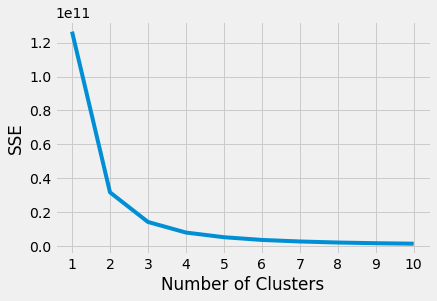

In [592]:
# Plot Clusters vs SSE
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [593]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [594]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_train_cleaned)
    score = silhouette_score(df_train_cleaned, kmeans.labels_)
    silhouette_coefficients.append(score)

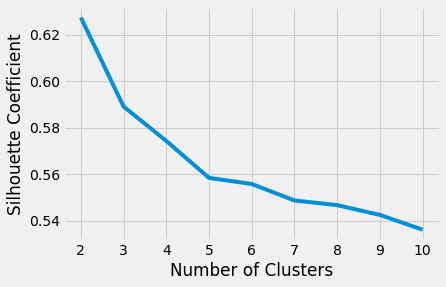

In [595]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Observation**
* Between Elbow and Sillhouette Method n_clusters = 5, seems a good balance to select

In [596]:
kmeans = KMeans(
                init="random",
                n_clusters=5,
                n_init=10,
                max_iter=300,
                random_state=8
         )

In [597]:
kmeans.fit(df_train_cleaned)

KMeans(init='random', n_clusters=5, random_state=8)

In [598]:
X_train_kmeans = kmeans.predict(df_train_cleaned)

In [599]:
X_train_kmeans = kmeans.predict(df_train_cleaned)
df_train_kmeans = pd.DataFrame(np.squeeze(X_train_kmeans), columns=['KMeansCluster']) 
df_train_cleaned = pd.concat([df_train_cleaned, df_train_kmeans], axis=1)

In [600]:
X_test_kmeans = kmeans.predict(df_test_cleaned)
df_test_kmeans = pd.DataFrame(np.squeeze(X_test_kmeans), columns=['KMeansCluster']) 
df_test_cleaned = pd.concat([df_test_cleaned, df_test_kmeans], axis=1)

In [601]:
df_test_cleaned.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,STL,BLK,TOV,FG_Missed,3P_Missed,FT_Missed,PPER,NPER,PER,KMeansCluster
0,1,0.416667,0.129496,0.112245,0.099237,0.114173,0.312839,0.000000,0.047619,0.414787,...,0.074074,0.057143,0.175,0.122137,0.068966,0.15625,0.158927,0.283730,0.170695,3
1,8194,0.308333,0.374101,0.319728,0.259542,0.287402,0.358047,0.333333,0.380952,0.439850,...,0.222222,0.085714,0.425,0.297710,0.379310,0.21875,0.191950,0.285714,0.217523,0
2,3,0.633333,0.724221,0.360544,0.351145,0.385827,0.367089,0.266667,0.428571,0.327068,...,0.481481,0.057143,0.475,0.396947,0.482759,0.28125,0.095975,0.178571,0.158610,3
3,8196,0.666667,0.983213,0.615646,0.496183,0.594488,0.305606,0.266667,0.404762,0.345865,...,0.333333,0.000000,0.875,0.656489,0.448276,0.56250,0.111455,0.244048,0.131420,0
4,8197,0.433333,0.206235,0.136054,0.099237,0.125984,0.254973,0.266667,0.380952,0.365915,...,0.185185,0.085714,0.200,0.145038,0.413793,0.06250,0.125903,0.226190,0.166163,0
5,6,0.441667,0.297362,0.217687,0.190840,0.145669,0.656420,0.200000,0.261905,0.414787,...,0.222222,0.085714,0.200,0.091603,0.275862,0.31250,0.184727,0.103175,0.345921,3
6,8198,0.325000,0.110312,0.085034,0.083969,0.078740,0.435805,0.200000,0.261905,0.414787,...,0.037037,0.028571,0.075,0.068702,0.275862,0.06250,0.115583,0.168651,0.194864,0
7,8202,0.391667,0.201439,0.136054,0.114504,0.129921,0.325497,0.000000,0.023810,0.624060,...,0.148148,0.085714,0.125,0.137405,0.034483,0.03125,0.113519,0.194444,0.172205,0
8,14,0.291667,0.429257,0.244898,0.213740,0.204724,0.466546,0.133333,0.190476,0.414787,...,0.185185,0.085714,0.325,0.183206,0.206897,0.12500,0.134159,0.146825,0.238671,3
9,8207,0.158333,0.151079,0.064626,0.053435,0.059055,0.318264,0.066667,0.142857,0.355890,...,0.074074,0.028571,0.100,0.061069,0.172414,0.03125,0.043344,0.125000,0.122356,0


**[]** Task: OneHot Encode KMeansCluster

In [602]:
# Load OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [603]:
# Task: Configure Columnst to One-Hot Encode
object_cols = ['KMeansCluster']
print("Categorical Variables:",object_cols)

Categorical Variables: ['KMeansCluster']


In [604]:
# Instantiate OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
# Apply OneHotEncoder to categorical columns
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train_cleaned[object_cols]))
# OneHotEncoding removed Index, put it back
OH_cols_train.index = df_train_cleaned.index
# Add Column Names
OH_cols_train.columns = OH_encoder.get_feature_names_out()

# Remove Categorical Columns (ready to replace with one-hot encoding)
df_train_cleaned_num = df_train_cleaned.drop(object_cols,axis=1)
# Add one-hot encoded columns to numerical features
df_train_cleaned = pd.concat([df_train_cleaned_num, OH_cols_train], axis=1)

In [605]:
# Instantiate OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
# Apply OneHotEncoder to categorical columns
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(df_test_cleaned[object_cols]))
# OneHotEncoding removed Index, put it back
OH_cols_test.index = df_test_cleaned.index
# Add Column Names
OH_cols_test.columns = OH_encoder.get_feature_names_out()

# Remove Categorical Columns (ready to replace with one-hot encoding)
df_test_cleaned_num = df_test_cleaned.drop(object_cols,axis=1)
# Add one-hot encoded columns to numerical features
df_test_cleaned = pd.concat([df_test_cleaned_num, OH_cols_test], axis=1)

In [606]:
df_test_cleaned.tail()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,3P_Missed,FT_Missed,PPER,NPER,PER,KMeansCluster_0,KMeansCluster_1,KMeansCluster_2,KMeansCluster_3,KMeansCluster_4
3794,8175,0.650000,0.419664,0.272109,0.236641,0.232283,0.448463,0.200000,0.261905,0.414787,...,0.275862,0.25000,0.143447,0.202381,0.209970,1.0,0.0,0.0,0.0,0.0
3795,8176,0.358333,0.302158,0.193878,0.198473,0.228346,0.325497,0.200000,0.261905,0.414787,...,0.275862,0.28125,0.153767,0.232143,0.202417,1.0,0.0,0.0,0.0,0.0
3796,8178,0.391667,0.148681,0.047619,0.038168,0.039370,0.334539,0.200000,0.261905,0.414787,...,0.275862,0.12500,0.063983,0.091270,0.178248,1.0,0.0,0.0,0.0,0.0
3797,8181,0.691667,0.829736,0.469388,0.389313,0.433071,0.359855,0.266667,0.261905,0.520050,...,0.241379,0.12500,0.104231,0.182540,0.167674,1.0,0.0,0.0,0.0,0.0
3798,8183,0.408333,0.199041,0.078231,0.061069,0.066929,0.327306,0.000000,0.119048,0.206767,...,0.172414,0.06250,0.061920,0.162698,0.120846,1.0,0.0,0.0,0.0,0.0


In [607]:
df_train_cleaned = pd.concat([df_train_cleaned, y_train_cleaned], axis=1)

In [624]:
df_test_cleaned.tail()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,3P_Missed,FT_Missed,PPER,NPER,PER,KMeansCluster_0,KMeansCluster_1,KMeansCluster_2,KMeansCluster_3,KMeansCluster_4
3794,8175,0.650000,0.419664,0.272109,0.236641,0.232283,0.448463,0.200000,0.261905,0.414787,...,0.275862,0.25000,0.143447,0.202381,0.209970,1.0,0.0,0.0,0.0,0.0
3795,8176,0.358333,0.302158,0.193878,0.198473,0.228346,0.325497,0.200000,0.261905,0.414787,...,0.275862,0.28125,0.153767,0.232143,0.202417,1.0,0.0,0.0,0.0,0.0
3796,8178,0.391667,0.148681,0.047619,0.038168,0.039370,0.334539,0.200000,0.261905,0.414787,...,0.275862,0.12500,0.063983,0.091270,0.178248,1.0,0.0,0.0,0.0,0.0
3797,8181,0.691667,0.829736,0.469388,0.389313,0.433071,0.359855,0.266667,0.261905,0.520050,...,0.241379,0.12500,0.104231,0.182540,0.167674,1.0,0.0,0.0,0.0,0.0
3798,8183,0.408333,0.199041,0.078231,0.061069,0.066929,0.327306,0.000000,0.119048,0.206767,...,0.172414,0.06250,0.061920,0.162698,0.120846,1.0,0.0,0.0,0.0,0.0


Visualise Correlation between X and y

In [625]:
import seaborn as sns

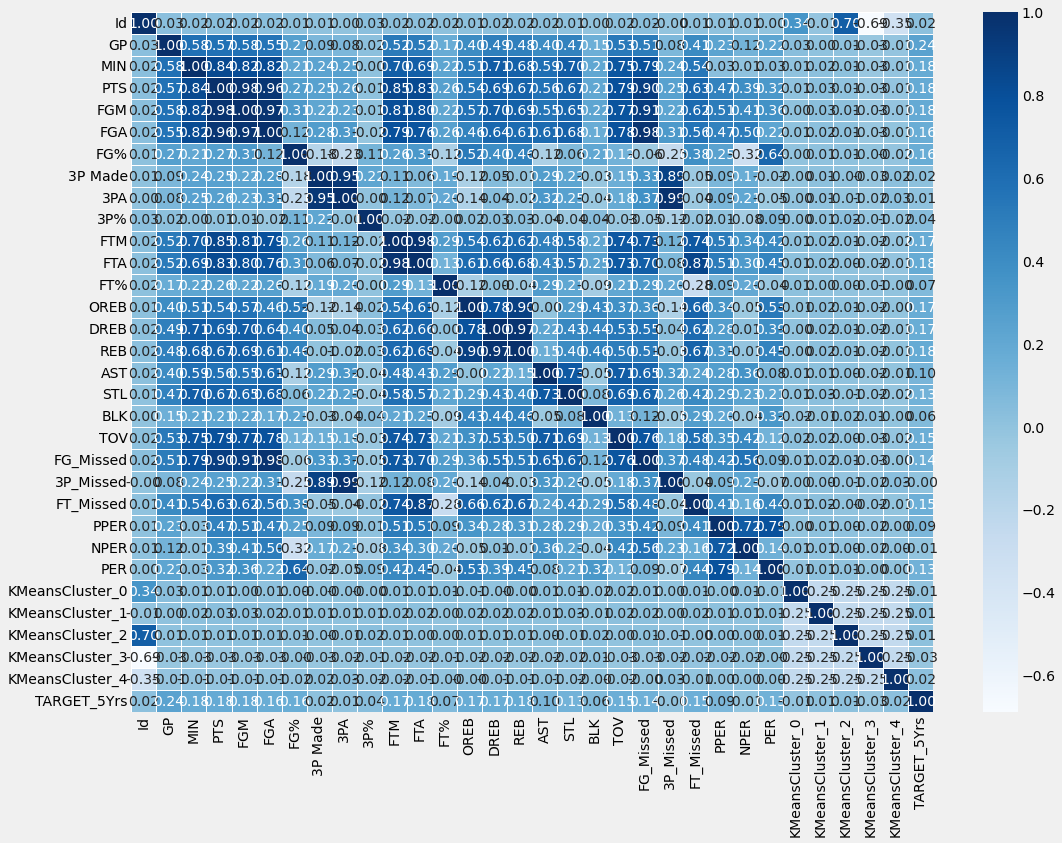

In [629]:
corr_matrix = df_train_cleaned.corr()
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

**[222]** Task: Save files as processed

In [609]:
# Save to CSV - train & test.csv
df_train_cleaned.to_csv("data/processed/train.csv", index = False)
df_test_cleaned.to_csv("data/processed/test.csv", index = False)

**[2.4]** Task: Create Train and Validate Datasets

In [610]:
# Drop Target and ID for X, and create target from y
df_train_id = df_train_cleaned['Id']
X = df_train_cleaned.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = df_train_cleaned['TARGET_5Yrs']

In [611]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GP               8000 non-null   float64
 1   MIN              8000 non-null   float64
 2   PTS              8000 non-null   float64
 3   FGM              8000 non-null   float64
 4   FGA              8000 non-null   float64
 5   FG%              8000 non-null   float64
 6   3P Made          8000 non-null   float64
 7   3PA              8000 non-null   float64
 8   3P%              8000 non-null   float64
 9   FTM              8000 non-null   float64
 10  FTA              8000 non-null   float64
 11  FT%              8000 non-null   float64
 12  OREB             8000 non-null   float64
 13  DREB             8000 non-null   float64
 14  REB              8000 non-null   float64
 15  AST              8000 non-null   float64
 16  STL              8000 non-null   float64
 17  BLK           

In [612]:
from sklearn.model_selection import train_test_split

In [613]:
# split the data in training and remaining dataset. 80:10:10 for train:valid:test
X_train, X_val, y_train, y_val  = train_test_split(X, y, train_size=0.8, shuffle = True, stratify=y, random_state = 8)

**[2.5]** Task: Save Datasets: X_train, X_val, y_train, y_val

In [614]:
from src.data.sets import save_sets

In [615]:
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=None, y_test=None, path='data/processed/')

**[2.5]** Task: Check train and validate datasets have been distributed well

In [616]:
y.value_counts(normalize=True)

1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

In [617]:
y_train.value_counts(normalize=True)

1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64